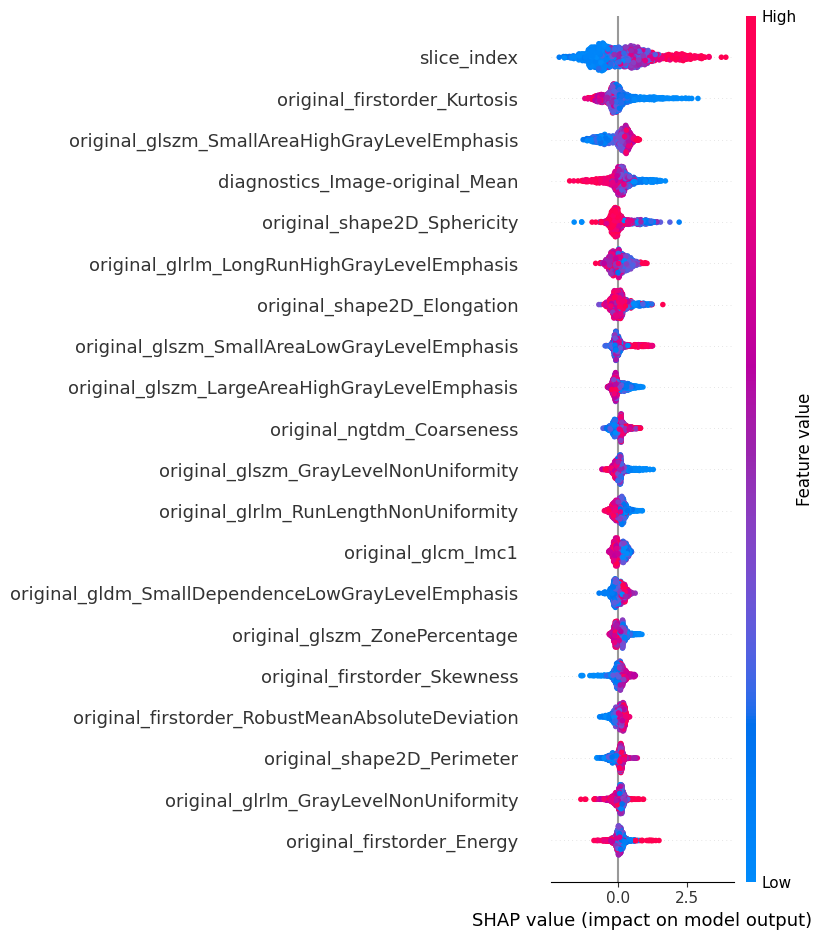

In [11]:
import pandas as pd
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

file_path = r'G:\methodical\exel\sono acoulastic\features_Opt&Subopt.csv'
data = pd.read_csv(file_path)
object_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=object_columns)

X = data.iloc[:, :-1] 
y = data.iloc[:, -1] 

y = y.map({1: 0, 2: 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

plt.figure(figsize=(12, 1000000)) 
shap.summary_plot(shap_values, X_test)